### calculate a rolling 30 days climatology (including terciles and quintiles) from IMERG over the period 2001 - 2018

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns

In [3]:
sns.set_context('paper')

In [4]:
import os
import sys
from glob import glob
import json
import pathlib

In [5]:
from datetime import datetime, timedelta

In [6]:
from dateutil import parser

In [7]:
import numpy as np
import pandas as pd 
import xarray as xr
import salem

In [8]:
!pwd

/home/nicolasf/operational/ICU/ops/GPM_IMERG/notebooks


In [9]:
import fiona
import geopandas as gpd

In [10]:
data_path = pathlib.Path.cwd().parents[1] / 'data' / 'GPM_IMERG' / 'daily' / 'extended_SP'

**note**: the extended South Pacific domain is extracted from TRMM using the following command (using the `pangeo_basemap` environment)  


```
python get_daily_TRMM_TMPA_netcdf.py -o /home/nicolasf/operational/ICU/ops/data/GPM_IMERG/daily/extended_SP -lonW 125 -lonE 240 -latN 25 -latS -50 -s 20010101 -e 20181231
```

In [11]:
dset_l = []
ln_lfiles = {}
for y in range(2001, 2018 + 1): 
    lyfiles = glob(os.path.join(data_path, 'GPM_IMERG_daily.v06.{}.??.??.nc'.format(y)))
    lyfiles.sort()
    dset = xr.open_mfdataset(lyfiles, combine='by_coords', data_vars=['precipitationCal'])
    dset['time'] = (('time'), pd.date_range(start='{}-1-1'.format(y), end='{}-12-31'.format(y)))
    ln_lfiles[y] = len(lyfiles)
    dset_l.append(dset)

In [12]:
for dset in dset_l: 
    print(dict(dset.dims), dset.time[0].data, dset.time[-1].data)

{'lat': 300, 'lon': 460, 'time': 365} 2001-01-01T00:00:00.000000000 2001-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2002-01-01T00:00:00.000000000 2002-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2003-01-01T00:00:00.000000000 2003-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 366} 2004-01-01T00:00:00.000000000 2004-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2005-01-01T00:00:00.000000000 2005-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2006-01-01T00:00:00.000000000 2006-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2007-01-01T00:00:00.000000000 2007-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 366} 2008-01-01T00:00:00.000000000 2008-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2009-01-01T00:00:00.000000000 2009-12-31T00:00:00.000000000
{'lat': 300, 'lon': 460, 'time': 365} 2010-01-01T00:00:00.000000000 2010-12-31T00:00:00.000000000
{'lat': 300, 'lon': 

In [13]:
dset = xr.concat(dset_l, dim='time')

In [14]:
dset

<xarray.Dataset>
Dimensions:           (lat: 300, lon: 460, time: 6574)
Coordinates:
  * lon               (lon) float64 125.1 125.4 125.6 ... 239.4 239.6 239.9
  * lat               (lat) float64 -49.88 -49.62 -49.38 ... 24.38 24.62 24.88
  * time              (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2018-12-31
Data variables:
    HQprecipitation   (time, lat, lon) float64 dask.array<chunksize=(1, 300, 460), meta=np.ndarray>
    precipitationCal  (time, lat, lon) float64 dask.array<chunksize=(1, 300, 460), meta=np.ndarray>
Attributes:
    BeginDate:       2001-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2001-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2001-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20010101-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-08T13:26:06.809Z

In [21]:
dset.nbytes / 1e9

14.515450672

In [22]:
shapes_ipath = os.path.join(os.environ['HOME'], 'operational/ICU/ops/data/shapefiles/ICU/clipped/countries_converted')

In [23]:
lshapefiles = glob(os.path.join(shapes_ipath, '*/*.shp'))

In [24]:
with open('../../data/dict_countries.json', 'r') as fj: 
    dict_countries = json.load(fj)

processing Vanuatu North


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Wallis & Futuna


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Society Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Northern Marianas


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Solomon Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Phoenix Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tuvalu


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Austral Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing New Caledonia


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Northern Cook Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Southern Cook Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Federated States of Micronesia


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing American Samoa


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Niue


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tuamotu / Gambier Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tokelau


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Papua New Guinea


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Marshall Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Palau


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Gilbert Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Line Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Pitcairn Islands


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tonga


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Samoa


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Guam


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Vanuatu South


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Nauru


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Marquesas


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Fiji


/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


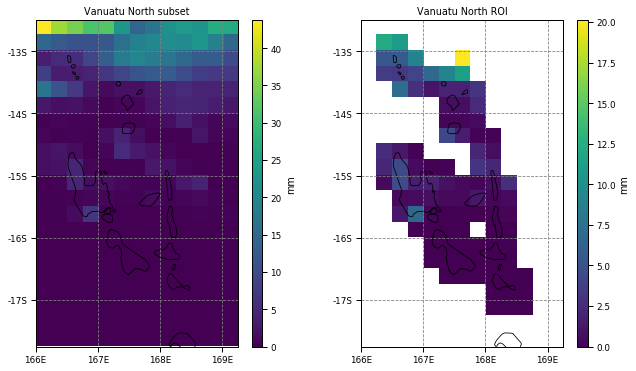

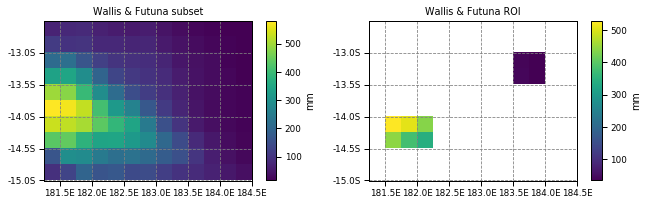

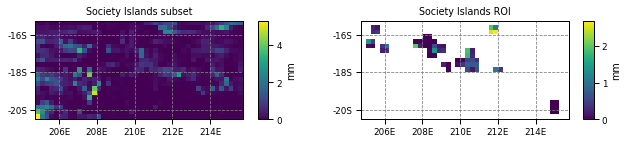

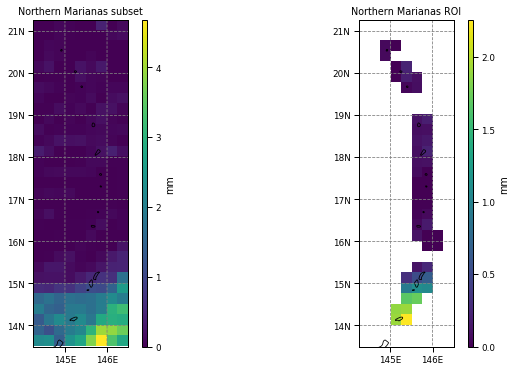

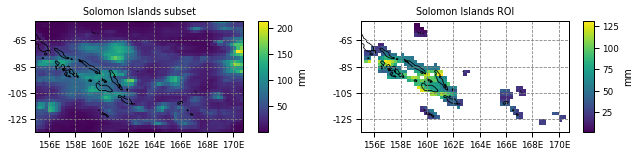

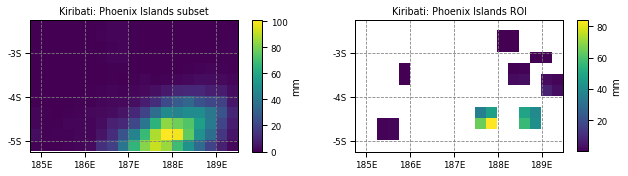

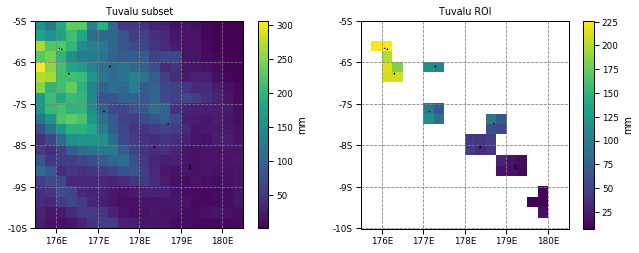

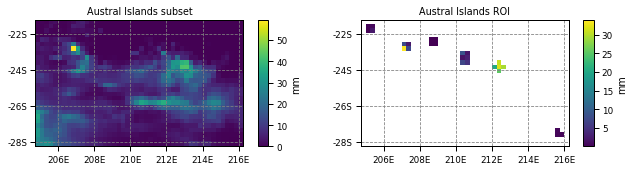

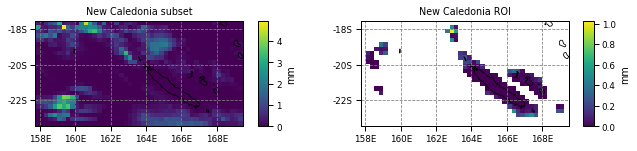

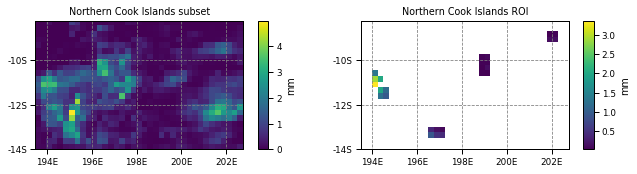

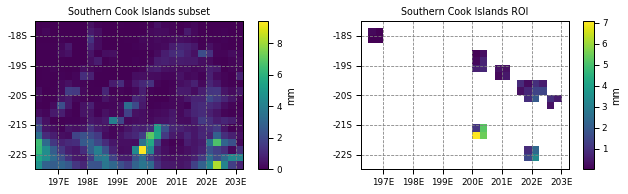

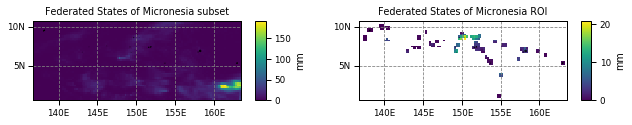

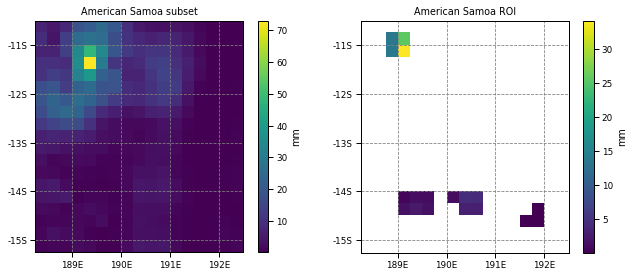

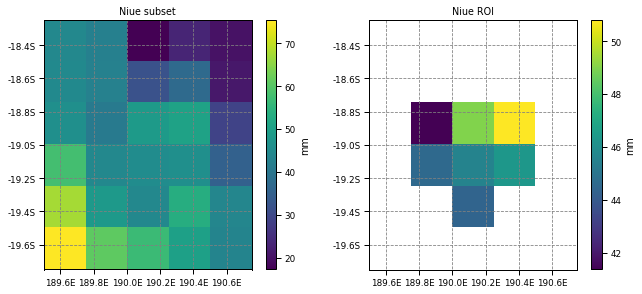

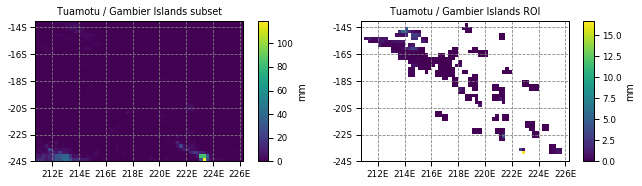

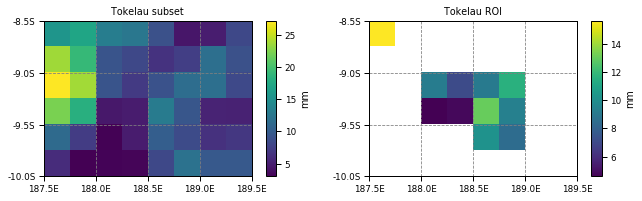

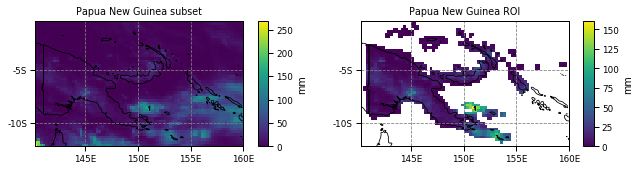

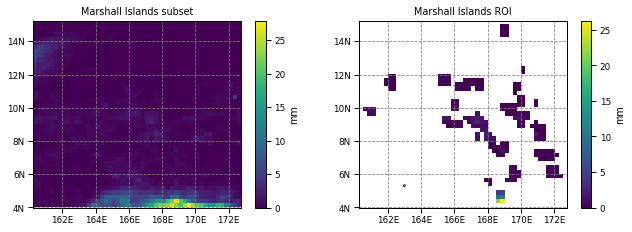

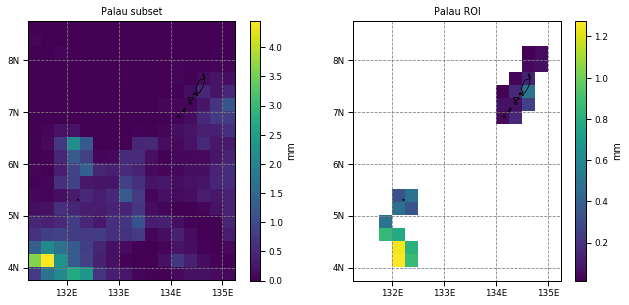

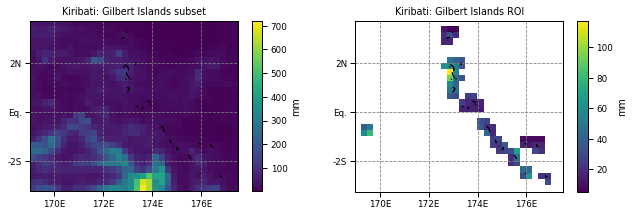

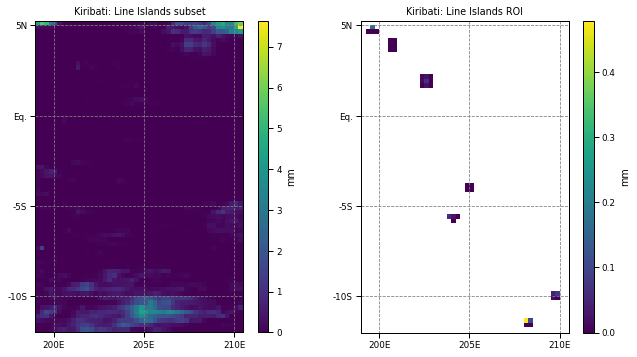

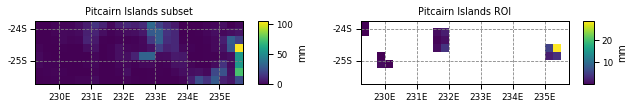

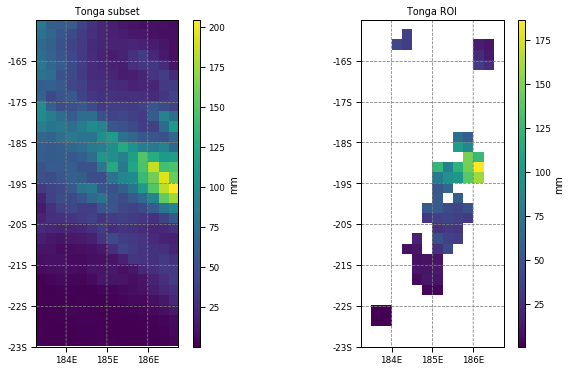

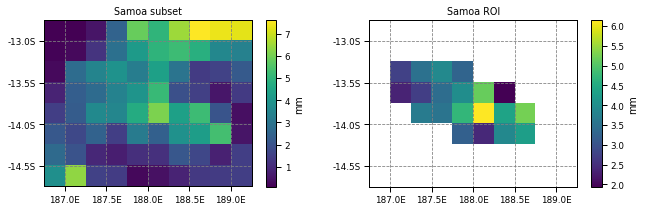

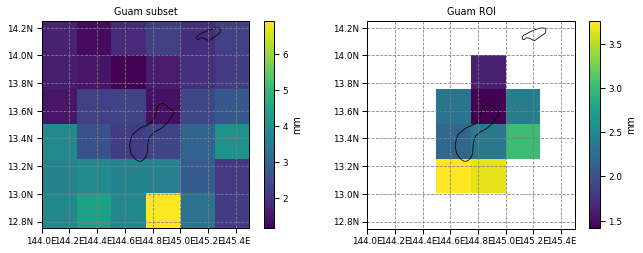

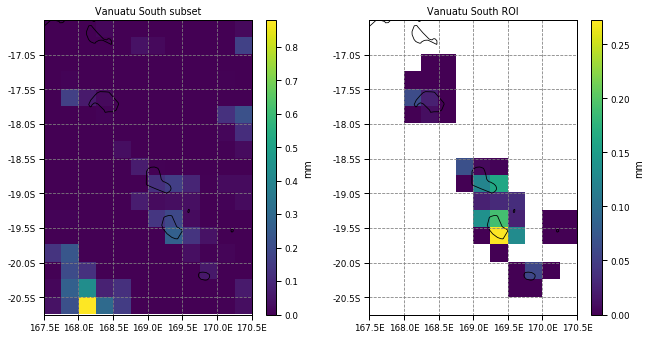

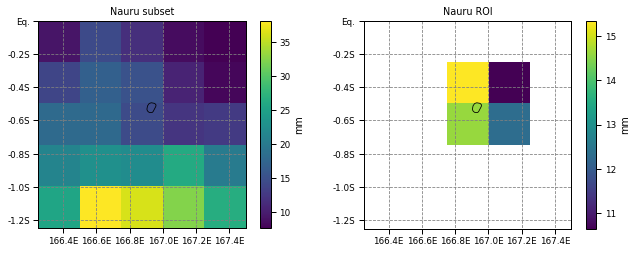

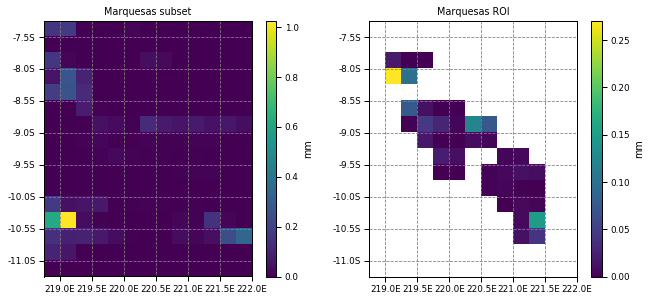

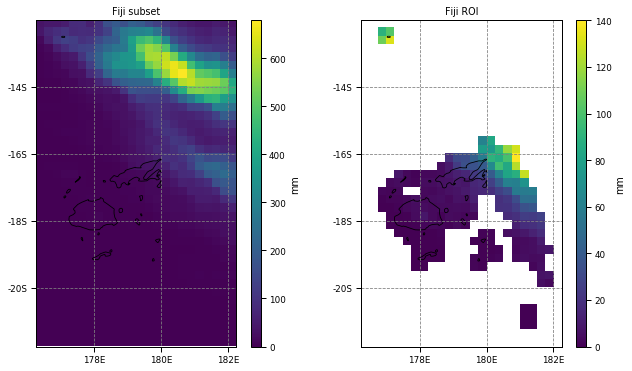

In [27]:
for filename in lshapefiles: 
    shapes = salem.read_shapefile(filename)
    country_fname = os.path.basename(filename)[7:-4]
    country_name = dict_countries[country_fname]
    print("processing {}".format(country_name))
    subset = dset.salem.subset(shape=shapes, margin=2)
    roi = subset.salem.roi(shape=shapes, all_touched=True)
    f, axes = plt.subplots(ncols=2, figsize=(10, 6))
    f.subplots_adjust(wspace=0.4)
    ax = axes[0]
    subset.isel(time=-1).precipitationCal.salem.quick_map(ax=ax)
    ax.set_title("{} subset".format(country_name))
    ax=axes[1]
    roi.isel(time=-1).precipitationCal.salem.quick_map(ax=ax)
    ax.set_title("{} ROI".format(country_name))
    f.savefig(pathlib.Path.cwd().parent / 'figures' / 'ROIs_maps' / '{}.png'.format(country_fname))
    roi_df = roi[['precipitationCal']].mean('lat').mean('lon')
    roi_df.compute()
    roi_df = roi_df.to_dataframe()
    roi_df.to_csv(pathlib.Path.cwd().parent / 'outputs' / 'DF_ROI_daily_GPM_IMERG_rainfall_2001_2018_{}.csv'.format(country_fname))
    subset.close() 
    roi.close() 

In [28]:
dset.close()

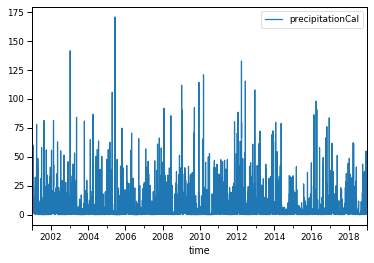

In [29]:
roi_df.plot()

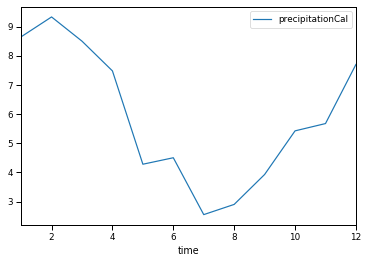

In [30]:
roi_df.groupby(roi_df.index.month).mean().plot()

In [31]:
window = 30

In [32]:
roi_df_rm = roi_df.rolling(window=window, min_periods=window).mean()

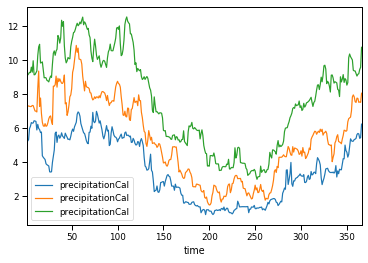

In [33]:
f, ax = plt.subplots()
roi_df_rm.groupby(roi_df_rm.index.dayofyear).quantile(0.25).plot(ax=ax)
roi_df_rm.groupby(roi_df_rm.index.dayofyear).quantile(0.5).plot(ax=ax)
roi_df_rm.groupby(roi_df_rm.index.dayofyear).quantile(0.75).plot(ax=ax)

In [34]:
climo = roi_df_rm.groupby(roi_df_rm.index.dayofyear).describe(percentiles=[0.1,0.2,0.3,0.333,0.4,0.5,0.6,0.666,0.7,0.8,0.9])

In [35]:
skew = roi_df_rm.groupby(roi_df_rm.index.dayofyear).skew()

In [36]:
kurt = roi_df_rm.groupby(roi_df_rm.index.dayofyear).apply(pd.DataFrame.kurt)

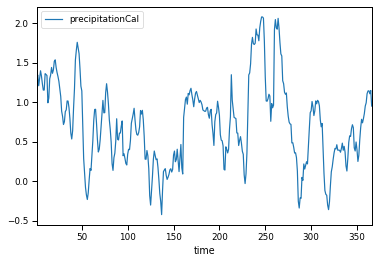

In [37]:
skew.plot()

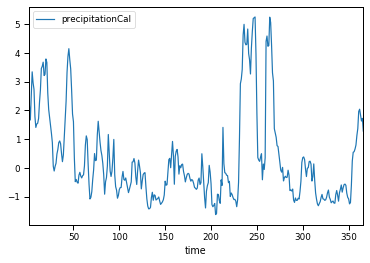

In [38]:
kurt.plot()

In [39]:
climo.index.name = 'dayofyear'

In [40]:
climo.columns = climo.columns.droplevel(0)

In [41]:
climo.columns

Index(['count', 'mean', 'std', 'min', '10%', '20%', '30%', '33.3%', '40%',
       '50%', '60%', '66.6%', '70%', '80%', '90%', 'max'],
      dtype='object')

In [42]:
climo

,count,mean,std,min,10%,20%,30%,33.3%,40%,50%,60%,66.6%,70%,80%,90%,max
dayofyear,,,,,,,,,,,,,,,,
1,17.0,7.688009,2.996014,3.960867,5.004882,5.150083,5.545966,5.942010,6.790363,7.351849,7.609945,7.725468,8.037547,9.351201,11.078563,15.736167
2,17.0,7.722493,3.169446,3.466873,4.988490,5.183081,5.553441,6.090977,7.088532,7.284861,7.465808,7.615597,7.942308,9.279412,11.363387,16.239548
3,17.0,7.686868,3.358165,3.354717,4.371543,4.765578,5.527673,6.115461,7.231730,7.307266,7.528726,7.642761,7.987510,9.267966,11.615169,16.350322
4,17.0,7.785496,3.506146,3.358130,3.852300,5.103897,6.074694,6.478983,7.256464,7.281936,7.560800,7.872821,8.275141,9.522927,11.375298,17.419303
5,17.0,7.854886,3.405653,3.355017,4.227315,5.134221,6.647651,6.866806,7.043835,7.269516,7.759234,8.427726,8.858331,9.624465,10.815214,17.633797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,18.0,7.693871,3.070327,3.729241,4.311680,5.040697,5.913530,5.998142,7.116789,7.750935,7.855450,8.030065,8.297262,9.477017,10.693148,16.091129
363,18.0,7.630179,3.092263,3.768231,4.330739,5.059633,5.689137,5.847303,6.118263,7.517176,7.997432,8.530056,8.553205,9.513528,10.636775,16.015038
364,18.0,7.755168,3.061513,3.960499,4.585233,5.177599,5.571676,5.731764,6.531106,7.543053,8.044313,8.954115,9.185257,9.576494,10.664209,15.972333


In [43]:
import seaborn as sns
sns.set_context('talk')

Text(0, 0.5, 'GPM/IMERG rainfall (mm/day)')

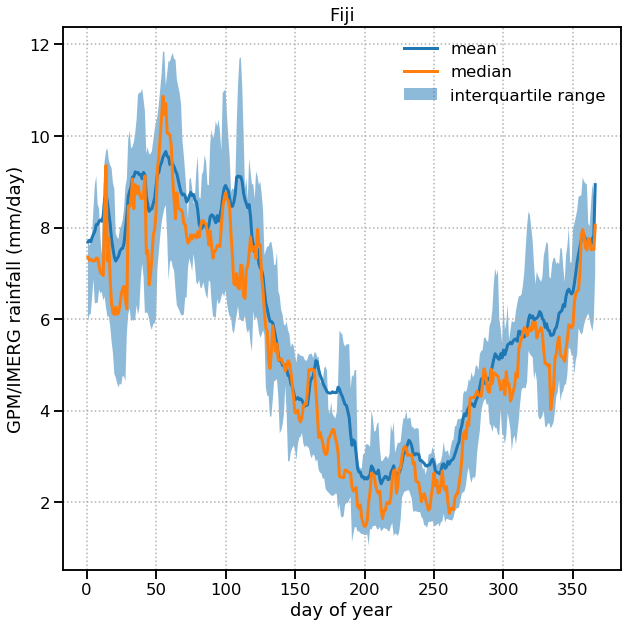

In [44]:
f, ax = plt.subplots(figsize=(10,10))
ax.fill_between(climo.index, climo.loc[:,'33.3%'].values, climo.loc[:,'66.6%'].values, alpha=0.5, label='interquartile range')
ax.plot(climo.loc[:,'mean'], lw=3, label='mean')
ax.plot(climo.loc[:,'50%'], lw=3, label='median')
ax.legend(frameon=False)
ax.grid(ls=':')
ax.set_title(country_name)
ax.set_xlabel('day of year')
ax.set_ylabel('GPM/IMERG rainfall (mm/day)')